# Step 2 

In [1]:
# Import libraries

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import random
import pulp

In [2]:
# Generating Points and Distances

n=12
random.seed(20246862)

def dist(p1, p2):
    (x1, y1) = p1
    (x2, y2) = p2
    return int(math.sqrt((x1-x2)**2+(y1-y2)**2)*700)

In [3]:
def x_of(p):
    (x,_)=p
    return x
def y_of(p):
    (_, y)=p
    return y

In [4]:
P = []
eps = 0.05
while len(P)<n:
    i=len(P)
    x0=random.random()
    if x0<eps or x0>1-eps:
        continue
    y0=random.random()
    if y0<eps or y0>1-eps:
        continue
    P.append((x0,y0))
    for j in range(0,i):
        if dist(P[i],P[j])<50:
            P=P[:-1]
            break
town = [ chr(ord('A')+i) for i in range(0,n) ]

In [5]:
P

[(0.780677152841719, 0.24768935251489643),
 (0.6008167803559864, 0.41640173572058525),
 (0.7024583369166644, 0.828931302861875),
 (0.8134190736361858, 0.6661570238600951),
 (0.8909057397782246, 0.22244841870937337),
 (0.5051656828427308, 0.8053764020364963),
 (0.27223883533777693, 0.6172355919936735),
 (0.3248493523899879, 0.8223706118904256),
 (0.27753712147053833, 0.9012762641076292),
 (0.39876804690573053, 0.9013481920739925),
 (0.6684820089960282, 0.6900332371885604),
 (0.1628215942158382, 0.5188748516716034)]

In [6]:
town

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

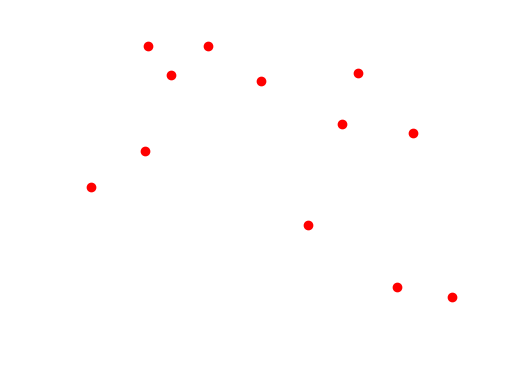

In [7]:
plt.xlim(0,1)
plt.ylim(0,1)
plt.axis('off')
plt.plot([ x for (x,_) in P ],[ y for (_,y) in P ], 'ro')

In [8]:
# Table of Distances

print("    ", end='')
for j in range(0, n):
    print(f"{town[j]:4s}", end='')
print()
for i in range(0, n):
    print(f"{town[i]:s}", end='')
    for j in range(0, n):
        if i==j:
            print(" ---", end='')
        else:
            print(f"{dist(P[i],P[j]):4d}", end='')
    print()

    A   B   C   D   E   F   G   H   I   J   K   L   
A --- 172 410 293  79 435 439 513 577 529 319 472
B 172 --- 297 229 244 280 269 343 407 367 197 314
C 410 297 --- 137 444 139 335 264 301 218 100 435
D 293 229 137 --- 315 236 380 359 409 333 102 466
E  79 244 444 315 --- 489 513 577 640 586 362 550
F 435 280 139 236 489 --- 209 126 172 100 139 312
G 439 269 335 380 513 209 --- 148 198 217 282 102
H 513 343 264 359 577 126 148 ---  64  75 257 240
I 577 407 301 409 640 172 198  64 ---  84 311 279
J 529 367 218 333 586 100 217  75  84 --- 239 314
K 319 197 100 102 362 139 282 257 311 239 --- 373
L 472 314 435 466 550 312 102 240 279 314 373 ---


# Step 3

In [9]:
# Creating variables

x = pulp.LpVariable.dicts("x", ( range(0,n), range(0,n) ),
                          lowBound=0, upBound=1, 
                          cat=pulp.LpInteger)

In [10]:
x

{0: {0: x_0_0,
  1: x_0_1,
  2: x_0_2,
  3: x_0_3,
  4: x_0_4,
  5: x_0_5,
  6: x_0_6,
  7: x_0_7,
  8: x_0_8,
  9: x_0_9,
  10: x_0_10,
  11: x_0_11},
 1: {0: x_1_0,
  1: x_1_1,
  2: x_1_2,
  3: x_1_3,
  4: x_1_4,
  5: x_1_5,
  6: x_1_6,
  7: x_1_7,
  8: x_1_8,
  9: x_1_9,
  10: x_1_10,
  11: x_1_11},
 2: {0: x_2_0,
  1: x_2_1,
  2: x_2_2,
  3: x_2_3,
  4: x_2_4,
  5: x_2_5,
  6: x_2_6,
  7: x_2_7,
  8: x_2_8,
  9: x_2_9,
  10: x_2_10,
  11: x_2_11},
 3: {0: x_3_0,
  1: x_3_1,
  2: x_3_2,
  3: x_3_3,
  4: x_3_4,
  5: x_3_5,
  6: x_3_6,
  7: x_3_7,
  8: x_3_8,
  9: x_3_9,
  10: x_3_10,
  11: x_3_11},
 4: {0: x_4_0,
  1: x_4_1,
  2: x_4_2,
  3: x_4_3,
  4: x_4_4,
  5: x_4_5,
  6: x_4_6,
  7: x_4_7,
  8: x_4_8,
  9: x_4_9,
  10: x_4_10,
  11: x_4_11},
 5: {0: x_5_0,
  1: x_5_1,
  2: x_5_2,
  3: x_5_3,
  4: x_5_4,
  5: x_5_5,
  6: x_5_6,
  7: x_5_7,
  8: x_5_8,
  9: x_5_9,
  10: x_5_10,
  11: x_5_11},
 6: {0: x_6_0,
  1: x_6_1,
  2: x_6_2,
  3: x_6_3,
  4: x_6_4,
  5: x_6_5,
  6: x_6_6,
 

In [11]:
# We need to keep track of the order in the tour to eliminate the possibility of subtours

u = pulp.LpVariable.dicts('u', (i for i in range(0,n)), lowBound=0, upBound=n, cat=pulp.LpInteger)

In [12]:
u

{0: u_0,
 1: u_1,
 2: u_2,
 3: u_3,
 4: u_4,
 5: u_5,
 6: u_6,
 7: u_7,
 8: u_8,
 9: u_9,
 10: u_10,
 11: u_11}

In [13]:
# Define Problem

problem = pulp.LpProblem("TSP",pulp.LpMinimize)

In [14]:
problem += pulp.lpSum([ dist(P[i],P[j])*x[i][j] 
                        for i in range(0,n)
                            for j in range(0,n)])

In [15]:
# Add Constraints
# Every Town is visited only once

for j in range(0,n):
    problem += pulp.lpSum([ x[i][j] 
                         for i in range(0,n) 
                             if i!=j
                       ]) ==1
constraints = n

In [16]:
# Every town was left only once:

for i in range(0,n):
    problem += pulp.lpSum([ x[i][j] 
                         for j in range(0,n)
                             if i!=j
                       ]) ==1
constraints += n

In [17]:
# Eliminate subtour
    
for i in range(0,n):
    for j in range(0,n):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n * (1 - x[i][j]) - 1
    constraints += n


In [18]:
print(f"{constraints:d} Constraints")

168 Constraints


In [19]:
# Check the encoding

problem

TSP:
MINIMIZE
172*x_0_1 + 319*x_0_10 + 472*x_0_11 + 410*x_0_2 + 293*x_0_3 + 79*x_0_4 + 435*x_0_5 + 439*x_0_6 + 513*x_0_7 + 577*x_0_8 + 529*x_0_9 + 319*x_10_0 + 197*x_10_1 + 373*x_10_11 + 100*x_10_2 + 102*x_10_3 + 362*x_10_4 + 139*x_10_5 + 282*x_10_6 + 257*x_10_7 + 311*x_10_8 + 239*x_10_9 + 472*x_11_0 + 314*x_11_1 + 373*x_11_10 + 435*x_11_2 + 466*x_11_3 + 550*x_11_4 + 312*x_11_5 + 102*x_11_6 + 240*x_11_7 + 279*x_11_8 + 314*x_11_9 + 172*x_1_0 + 197*x_1_10 + 314*x_1_11 + 297*x_1_2 + 229*x_1_3 + 244*x_1_4 + 280*x_1_5 + 269*x_1_6 + 343*x_1_7 + 407*x_1_8 + 367*x_1_9 + 410*x_2_0 + 297*x_2_1 + 100*x_2_10 + 435*x_2_11 + 137*x_2_3 + 444*x_2_4 + 139*x_2_5 + 335*x_2_6 + 264*x_2_7 + 301*x_2_8 + 218*x_2_9 + 293*x_3_0 + 229*x_3_1 + 102*x_3_10 + 466*x_3_11 + 137*x_3_2 + 315*x_3_4 + 236*x_3_5 + 380*x_3_6 + 359*x_3_7 + 409*x_3_8 + 333*x_3_9 + 79*x_4_0 + 244*x_4_1 + 362*x_4_10 + 550*x_4_11 + 444*x_4_2 + 315*x_4_3 + 489*x_4_5 + 513*x_4_6 + 577*x_4_7 + 640*x_4_8 + 586*x_4_9 + 435*x_5_0 + 280*x_5_1 + 139*x_

In [20]:
# Solve Problem and Display Solution

problem.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/hanisibr/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/5t/7h86v1rd1sg2cp_m3c7mtv8r0000gn/T/30e866a3dcd74ae7b4cc90ddb9531ad4-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/5t/7h86v1rd1sg2cp_m3c7mtv8r0000gn/T/30e866a3dcd74ae7b4cc90ddb9531ad4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 139 COLUMNS
At line 1152 RHS
At line 1287 BOUNDS
At line 1431 ENDATA
Problem MODEL has 134 rows, 143 columns and 594 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 1380 - 0.00 seconds
Cgl0004I processed model has 134 rows, 143 columns (143 integer (132 of which binary)) and 594 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 10 integers unsatisfied sum - 1.66667
Cbc0038I Pass   1: suminf.    1.66667 (

1

In [21]:
# Plot the optimal route

def isElem(x, l):
    for i in range(0, len(l)):
        if l[i]==x:
            return True
    return False



In [22]:
def startpoint(trips):
    for i in range(0,n):
        for t in trips:
            if isElem(i, t):
                break
        else:
            return i

In [23]:
def totallength(trips):
    s=0
    for i in range(0, len(trips)):
        s += len(trips[i])-1
    return s

In [24]:
trips = []
while totallength(trips)<n:
    start = startpoint(trips)
    trip = [ start ]
    i = start
    while len(trip) < n-totallength(trips):
        for j in range(0, n):
            if pulp.value(x[i][j])==1:
                trip.append(j)
                i=j
                break        
        if pulp.value(x[trip[-1]][start])==1:
            trip.append(start)
            break
    trips.append(trip)
trips

[[0, 4, 3, 10, 2, 5, 9, 8, 7, 6, 11, 1, 0]]

In [25]:
pulp.value(problem.objective)

1719.0

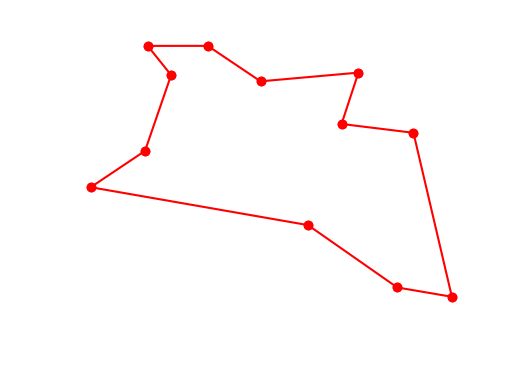

In [26]:
plt.xlim(0,1)
plt.ylim(0,1)
plt.axis('off')
for t in trips:
    for k in range(0,len(t)-1):
        plt.plot([ x_of(P[t[k]]), x_of(P[t[k+1]])], 
                 [ y_of(P[t[k]]), y_of(P[t[k+1]])], 'r-o')

## References:
## C. Horn (2023). Modelling, Simulation and Optimization: TSP
## Kaggle (2020) TSP PuLP Optimization / PyTorch Deep Learning. Available at:[https://www.kaggle.com/code/itoeiji/tsp-pulp-optimization-pytorch-deep-learning]